<a href="https://colab.research.google.com/github/tasnimxpress/Product-Sales-Analysis/blob/main/Product_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRODUCT SALES ANALYSIS
   We have 12 months sales data broken down by month, prodcut type, cost, address etc. In this analysis I am using google Collab. 
* * *

<a id="PROBLEMS"><h1>PROBLEMS</h1> </a>

<h3>I will try to answer some questions written below:</h3>

1.   What was the best month for sales? How much was earned that month?
2. What city sold the most product?
3. What time should we display advertisements to maximize likelihood of customer’s buying products?
4. What Products are most often sold together?  
5. What product sold the most? Why?



### Import pandas and Numpy

In [57]:
import pandas as pd
import numpy as np

### Checking data

In [58]:
data = pd.read_csv("sales_data.csv")

In [59]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [60]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [61]:
data.shape

(186850, 6)

    |As we can see dataset contain 186850 rows, and 6 columns. All the columns are object data type, maybe we need to change data type. we will do it later. Now, there are some null values. In order to get most accurate answers we need to clean null values. Lets check how many null we have.

In [62]:
null = data[data.isnull().any(axis=1)]
null.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


### Removing null

In [63]:
data = data.dropna(how="all")

In [64]:
data.shape

(186305, 6)

    |As we can see null values are removed.

## lets attemp questions:
[PROBLEMS](#PROBLEMS)
    
1. What was the best month for sales? How much was earned that month?

To answer the question I need month and sales column. But As we see above data we don't have any column named month or sales. But, from "order date" column we can extract month and sales from quantity ordered and price column. Let's create them.


In [65]:
data['Month'] = data['Order Date'].str[0:2]

In [66]:
data['Month'] = data['Month'].astype('int32')
data.head()

ValueError: ignored

 <div class="alert alert-block alert-danger">
<b>Error:</b> Here, I get issues. There are values 'Or' in data. let's check it.
</div>

In [67]:
checkingOr = data[data['Order Date'].str[0:2]=='Or']
checkingOr.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


    So, Or is coming from Month column. let's change it just by changing equal sign to not equal.

In [68]:
data = data[data['Order Date'].str[0:2]!='Or']

In [69]:
data['Month'] = data['Order Date'].str[0:2]
data['Month'] = data['Month'].astype('int32')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


    Alright! month column is created. In the second step I will create Sales column. But, before going ahead lets check data another time:

In [70]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

    As we can see Quantity Orders and Price Each are string value. We can not multiply strings in order to get Sales. So, we need to convert data types first.

In [71]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

In [72]:
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

    Alright! Data type has been changed to numeric value as int and float. Lets create Sales column.

In [73]:
data['Sales'] = data['Quantity Ordered']*data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


    Sales column is successfully created. let's, find out the answer of first question.

In [74]:
Monthly_sales = data.groupby('Month').sum().sort_values(by='Sales', ascending=False)
Monthly_sales.head(12)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


    Clearly, Month 12 Which is december is the highest sales with nearly $4614000. we need to visualize it to make people easier to understand.

### Import Matplotlib and plotly

In [75]:
import matplotlib.pyplot as matlib
import plotly.express as px

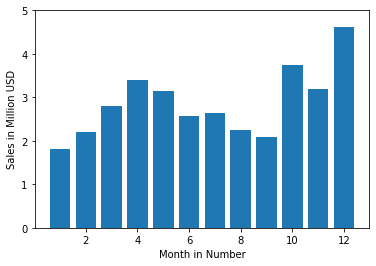

In [76]:
months=range(1,13) #x axes
result=data.groupby('Month').sum()
matlib.bar(months, result['Sales'])
label, location = matlib.yticks()
matlib.yticks(label,(label/1000000).astype(int))
matlib.xlabel('Month in Number')
matlib.ylabel('Sales in Million USD')

matlib.show()

In [77]:
px.bar(Monthly_sales, y= 'Sales', color='Quantity Ordered')

<div class="alert alert-block alert-success">
<b>Visualize:</b> Here, not only the highest sales, but we can also get the lowest sales just by looking at the bar for a few seconds. December is the highest selling month and january is the least.
</div>

[PROBLEMS](#PROBLEMS)

2. What city sold the most product?

In [78]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [79]:
data['City'] = data['Purchase Address'].apply(lambda x: x.split(',')[1])+ " " +data['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [80]:
sales_by_city = data.groupby(['City']).agg({'Sales':'sum'}).reset_index()
sales_by_city

,City,Sales
0,Atlanta GA,2795498.58
1,Austin TX,1819581.75
2,Boston MA,3661642.01
3,Dallas TX,2767975.40
4,Los Angeles CA,5452570.80
5,New York City NY,4664317.43
6,Portland ME,449758.27
7,Portland OR,1870732.34
8,San Francisco CA,8262203.91
9,Seattle WA,2747755.48


In [81]:
sales_by_city.sort_values('Sales', ascending=False)

,City,Sales
8,San Francisco CA,8262203.91
4,Los Angeles CA,5452570.80
5,New York City NY,4664317.43
2,Boston MA,3661642.01
0,Atlanta GA,2795498.58
3,Dallas TX,2767975.40
9,Seattle WA,2747755.48
7,Portland OR,1870732.34
1,Austin TX,1819581.75
6,Portland ME,449758.27


In [105]:
px.bar(sales_by_city, y='Sales')

<div class="alert alert-block alert-success">
<b>Visualize:</b> Here, san fransisco is the most selling city compare to other cities with approximately $82,00,000. 
</div>

[PROBLEMS](#PROBLEMS)
   
   3. What Time Should We Display Advertisements to Maximize Likelihood of Customer’s Buying Product?

<div class="alert alert-block alert-warning">
<b>To Do This:</b> Grouping data by hours and counting all the orders should work. Hour is in the Order Date column. I will now extract it.
</div>

In [83]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [84]:
data['Order Date_DTO']=pd.to_datetime(data['Order Date'])
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date_DTO
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,2019-04-07 22:30:00
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-30 09:27:00


In [85]:
data['Hour'] = data['Order Date_DTO'].dt.hour
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date_DTO,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-30 09:27:00,9


In [86]:
hours_count = data.groupby(['Hour']).count().reset_index()
hours_count.head()

,Hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date_DTO
0,0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,3,831,831,831,831,831,831,831,831,831,831
4,4,854,854,854,854,854,854,854,854,854,854


In [87]:
px.line(hours_count, y='Quantity Ordered')

<div class="alert alert-block alert-success">
<b>Visualize:</b> As we can see from line chart, there are approximately 2 peaks at the data - 
    12 (12 PM) and 19 (7 PM). 
    So, we can say most people shopping during this hour. From this data, we can suggest to our bussiness partner to advertise their product right before 12 PM and/or 7 PM. <br>It could be 11.30 AM and/or 6.30 PM.
</div>

[PROBLEMS](#PROBLEMS)

 4. What Products are most often sold together?

In [88]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date_DTO,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-30 09:27:00,9


<div class="alert alert-block alert-warning">
<b>To Do This:</b> By seeing dataset we can say that “Order ID” indicate transaction. So by grouping the product by the Order ID, we are able to know what products are often sold together.
</div>

In [89]:
new_data = data[data['Order ID'].duplicated(keep=False)]

#join product with same order ID
new_data['Sold_together'] = new_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
new_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date_DTO,Hour,Sold_together
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,2019-04-12 14:38:00,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-12 14:38:00,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,2019-04-03 19:42:00,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,2019-04-03 19:42:00,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,2019-04-07 11:31:00,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


<div class="alert alert-block alert-danger">
<b>Warning:</b> I get a warning here. Its because some paird data are encountered twice. That's mean I need to remove duplicate data to get accurate answer. lets, remove duplicate.
</div>

In [90]:
#dropping duplicate values
new_data = new_data[['Order ID', 'Sold_together']].drop_duplicates()
new_data.head()

,Order ID,Sold_together
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


<div class="alert alert-block alert-warning">
<b>Info:</b> To find the answer of the question I will count the pair of products. To do that, new lybraries will be needed to count the combinations to Sold_together. I will use <i>itertools</i> and <i>collections</i> libraries
</div>

### import libraries

In [91]:
from itertools import combinations
from collections import Counter

In [92]:
count=Counter()
for row in new_data['Sold_together']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [93]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [94]:

px.bar(new_data, y='Sold_together',width=1000,height=800)

In [95]:
px.treemap(new_data , path = ['Sold_together'] , values = 'Order ID')

In [96]:
px.sunburst(new_data, path=['Sold_together'], values = 'Order ID')

<div class="alert alert-block alert-success">
<b>Visualize:</b> What did I find out? Well, We can see the most often sold products together are iPhone and lightning Charging Cable, Google phone and USB-C charging cable, iphone and Wired Headphones.
    
    From treemap we are getting betting understanding

What would we do with this data? Well, we could offer a smart deal to the customer that buy iPhone, and you will get charging cable with discount and also for other pairs. That’s one of the possibility and stackholder can bundle the remaining products if need to.
</div>

[PROBLEMS](#PROBLEMS)
 
 5. What product sold the most? Why?

In [97]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Date_DTO,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-30 09:27:00,9


In [98]:
product_group = data.groupby('Product')
product_group.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


In [99]:
quantity_ordered = product_group.sum()['Quantity Ordered'].reset_index()
quantity_ordered

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


In [100]:
px.bar(quantity_ordered, y='Quantity Ordered', x='Product')

***Now we can see what product sold the most, it’s AAA Batteries(4 pack). We can also see that AA Batteries (4 pack), Lightning Charging Cable, USB-C Charging Cable, and Wired Headphones are sold more than other products. But, Why are they sold the most?***

 **The first impression is that they are cheaper than other products. As a data analyst, let’s prove this hypothesis.**

In [101]:
prices = data.groupby('Product').min()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [102]:
px.line(prices,y='Price Each')

<div class="alert alert-block alert-success">
<b>Visualize:</b> Now we will interprate our results. Our hypothesis is true if the high sold products have low price. From the graph we can see it is the case for AAA Batteries and all products except the Macbook Pro Laptop and ThinkPad Laptop. They have decent orders eventhough they are expensive. We can say that there are many people in the world need laptops. So the laptops are the exception because the laptops have high demand.
</div>

<a id="SOLUTION"><h1>FINAL FINDINGS:</h1>
    


1. What was the best month for sales? How much was earned that month?
    
    The best month for sales is December. The company earned approximately $ 4,61,400.
    
    
2. What city sold the most product?

    San Fransisco is the city with the highest sales.
    
    
3. What time should we display advertisements to maximize likelihood of customer’s buying products?

    We can suggest to advertise the products right before 12 PM and/or 7 PM. It could be 11.30 AM and/or 6.30 PM.
    
    
4. What Products are most often sold together?

    The most often products sold together are iPhone and Lightning Charging Cable with 1005 transactions.
    
    
5. What product sold the most? Why?

    AAA Batteries(4 pack) is the most sold product. Because it’s cheaper than other products and has high demand.


</a>


## THANK YOU
* * *